<a href="https://colab.research.google.com/github/gandalf1819/SF-Opioid-Crisis/blob/master/SF_drug_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### **San Francisco’s Opioid Crisis and Drug Problem and effects on public safety**

**Team #14**

Kartikeya Shukla (ks5173) <br>
Chinmay Wyawahare (cnw282) <br>
Hao Shu (hs3812)

The War on Drugs is a phase used to refer to a government-led initiative that aims to stop illegal drug use, distribution, and trade by increasing and enforcing penalties for offenders. The movement started in the 1970s and is still evolving today. Conse- quently, numerous US are experiencing an opioid crisis in recent times. There is an ongoing debate, the opioid crisis is the product of Mexican and Central American migration - rather than the deregulation of Big Pharma and the failures of a private health care system. Consequently, at this instance, San Francisco is facing a major drug problem and opioid crisis.

San Francisco (SF) has a long history of pushing the envelope on progressive pub- lic health solutions, including medical cannabis and needle exchange, before either was legal or broadly embraced. It is so out of proportion, that California passed a bill allowing SF to open Safe Injection Sites (SIS)

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import sys,os
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
sns.set()

In [0]:
d_crime = pd.read_csv("/content/gdrive/My Drive/SF dataset/Police_Department_Incident_Reports__Historical_2003_to_May_2018.csv")

In [0]:
d_crime.head(5)

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,146196161,NON-CRIMINAL,LOST PROPERTY,Tuesday,09/23/2014,01:00,SOUTHERN,NONE,800 Block of BRYANT ST,-122.403405,37.775421,POINT (-122.403404791479 37.775420706711),14619616171000
1,150045675,ASSAULT,BATTERY,Thursday,01/15/2015,17:00,TARAVAL,NONE,1800 Block of VICENTE ST,-122.485604,37.738821,POINT (-122.48560378101 37.7388214326705),15004567504134
2,140632022,SUSPICIOUS OCC,INVESTIGATIVE DETENTION,Wednesday,07/30/2014,09:32,BAYVIEW,NONE,100 Block of GILLETTE AV,-122.396535,37.710660,POINT (-122.396535107224 37.7106603302503),14063202264085
3,150383259,ASSAULT,BATTERY,Saturday,05/02/2015,23:10,BAYVIEW,"ARREST, BOOKED",2400 Block of PHELPS ST,-122.400131,37.730093,POINT (-122.400130573297 37.7300925390327),15038325904134
4,40753980,OTHER OFFENSES,RECKLESS DRIVING,Friday,07/02/2004,13:43,BAYVIEW,NONE,I-280 / CESAR CHAVEZ ST,-120.500000,90.000000,POINT (-120.5 90),4075398065020


In [0]:
d_crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2215024 entries, 0 to 2215023
Data columns (total 13 columns):
IncidntNum    int64
Category      object
Descript      object
DayOfWeek     object
Date          object
Time          object
PdDistrict    object
Resolution    object
Address       object
X             float64
Y             float64
Location      object
PdId          int64
dtypes: float64(2), int64(2), object(9)
memory usage: 219.7+ MB


In [0]:
print(d_crime.shape)
d_crime.head(1)

(2215024, 13)


,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,146196161,NON-CRIMINAL,LOST PROPERTY,Tuesday,09/23/2014,01:00,SOUTHERN,NONE,800 Block of BRYANT ST,-122.403405,37.775421,POINT (-122.403404791479 37.775420706711),14619616171000


In [0]:
date=pd.to_datetime(d_crime['Date'])
print(date.min())
print(date.max())
t_delta=(date-date.min()).astype('timedelta64[D]')
d_crime['days']=t_delta
d_crime.head(1)

2003-01-01 00:00:00
2018-05-15 00:00:00


,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId,days
0,146196161,NON-CRIMINAL,LOST PROPERTY,Tuesday,09/23/2014,01:00,SOUTHERN,NONE,800 Block of BRYANT ST,-122.403405,37.775421,POINT (-122.403404791479 37.775420706711),14619616171000,4283.0


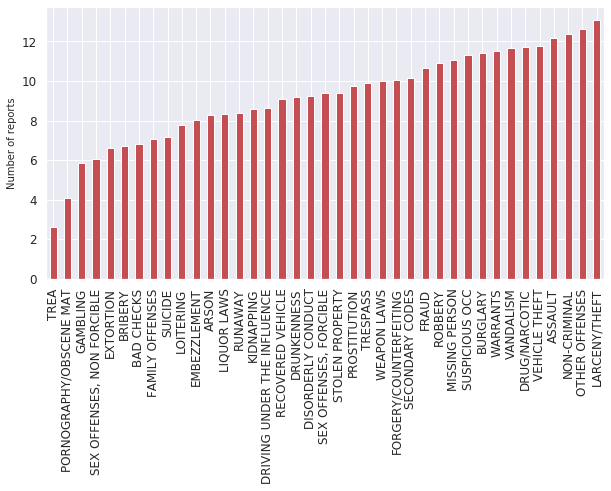

In [0]:
def plotdata(data,cat):
    l=data.groupby(cat).size()
    l=np.log(l)
    l=l.sort_values()
    fig=plt.figure(figsize=(10,5))
    plt.yticks(fontsize=8)
    l.plot(kind='bar',fontsize=12,color='r')
    plt.xlabel('')
    plt.ylabel('Number of reports',fontsize=10)

plotdata(d_crime,'Category')

In [0]:
l=d_crime.groupby('Descript').size()
l=l.sort_values()
print(l.shape)

(915,)


Since there's 915 different crime types, let's slice by percentile and filter the crimes below 97th percentile. Let's have a look at the top types of crime for each PdDistrict.

In [0]:
def types_districts(d_crime,per):
    
    # Group by crime type and district 
    hoods_per_type=d_crime.groupby('Descript').PdDistrict.value_counts(sort=True)
    t=hoods_per_type.unstack().fillna(0)
    
    # Sort by hood sum
    hood_sum=t.sum(axis=0)
    hood_sum=hood_sum.sort_values(ascending=False)
    t=t[hood_sum.index]
    
    # Filter by crime per district
    crime_sum=t.sum(axis=1)
    crime_sum=crime_sum.sort_values()
    
    # Large number, so let's slice the data.
    p=np.percentile(crime_sum,per)
    ix=crime_sum[crime_sum>p]
    t=t.loc[ix.index]
    return t
    
t=types_districts(d_crime,97)

Cluster the non-normalized data across the top percentile reports and each PdDistrict.

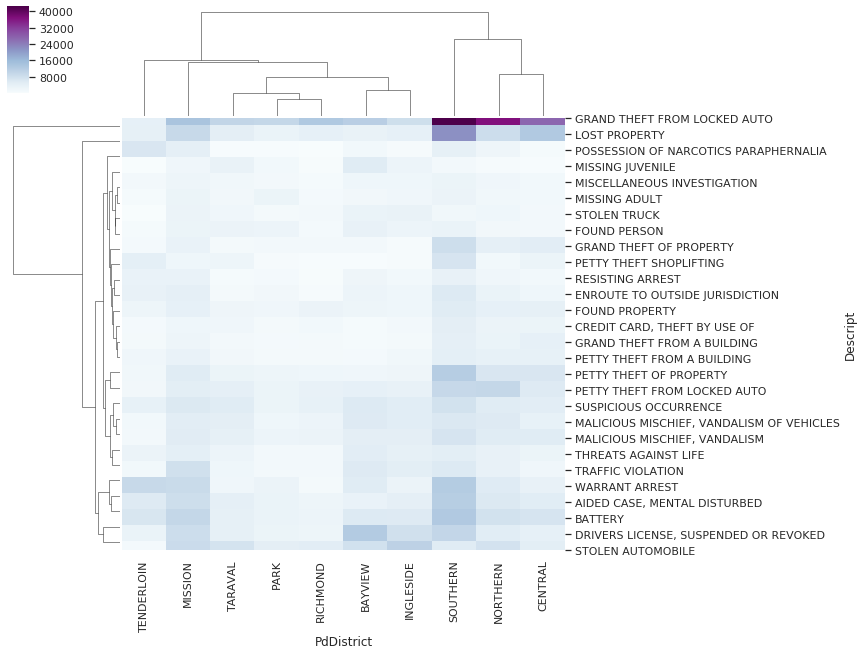

In [0]:
sns.clustermap(t,cmap="BuPu")

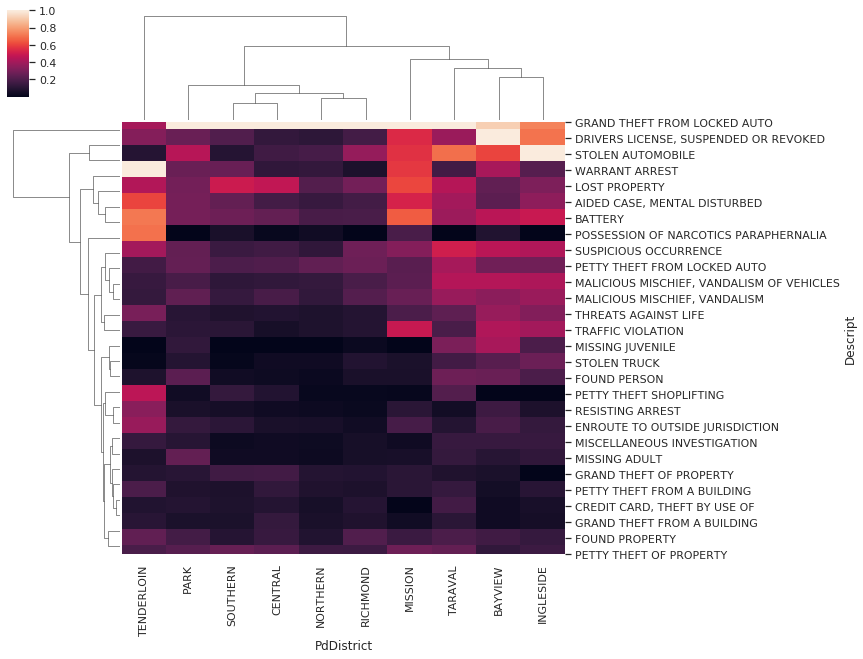

In [0]:
#Normalize vertically across PdDistrict.
sns.clustermap(t,standard_scale=1,  vmin=0.0002, vmax=1)

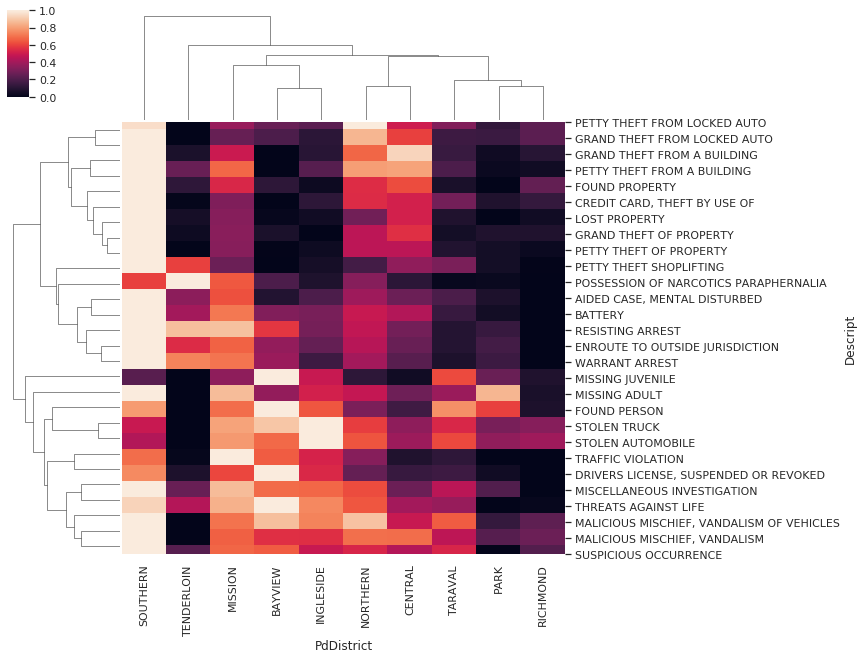

In [0]:
#Normalize horizontally across crime types.
sns.clustermap(t,standard_scale=0) 



1.   GTA is the most common crime in most PdDistricts.

  *   Tenderloin is an outlier, enriched in base/rock crack and narcotics.


2.   For the distribution of crime across areas:
  
  *   Southern: Theft, including theft from auto.
  *   Tenderloin: Base / rock crack and narcotics.
  *   Bayview: Violence and threats.

**Now, let's drill down on a specific question -** Lets, re-examine the crime types.






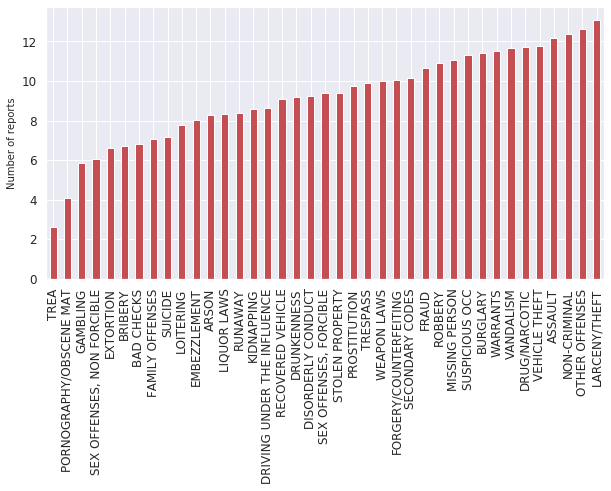

In [0]:
plotdata(d_crime,'Category')

We're interested in DRUG/NARCOTIC:


1.    it will show some interesting dynamics.
2.   different areas of the city will have different distributions.





In [0]:
# Let's drill down onto one
cat=d_crime[d_crime['Category']=='DRUG/NARCOTIC']
c=cat['Descript'].value_counts()
c.sort_values(ascending=False)
c.head(10)

POSSESSION OF NARCOTICS PARAPHERNALIA       22891
POSSESSION OF BASE/ROCK COCAINE             14348
POSSESSION OF MARIJUANA                     11883
SALE OF BASE/ROCK COCAINE                    9119
POSSESSION OF METH-AMPHETAMINE               8747
POSSESSION OF BASE/ROCK COCAINE FOR SALE     8024
POSSESSION OF MARIJUANA FOR SALES            5964
POSSESSION OF HEROIN                         4556
POSSESSION OF CONTROLLED SUBSTANCE           4508
POSSESSION OF COCAINE                        3207
Name: Descript, dtype: int64

In [0]:
#We can use what we had above, but we simply slice the input data on a category first (above).
t=types_districts(cat,70)

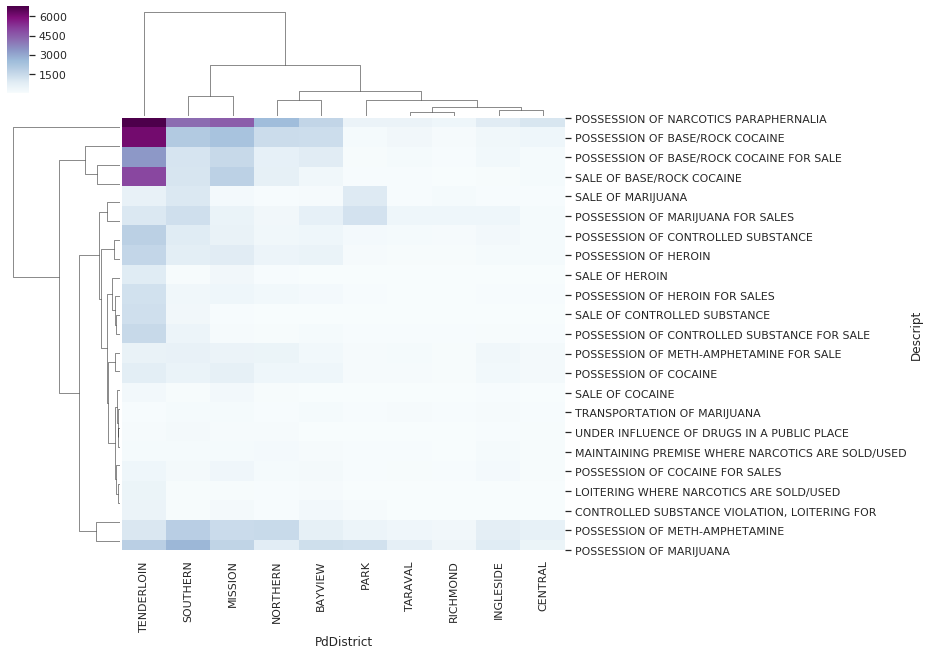

In [0]:
sns.clustermap(t,cmap='BuPu')

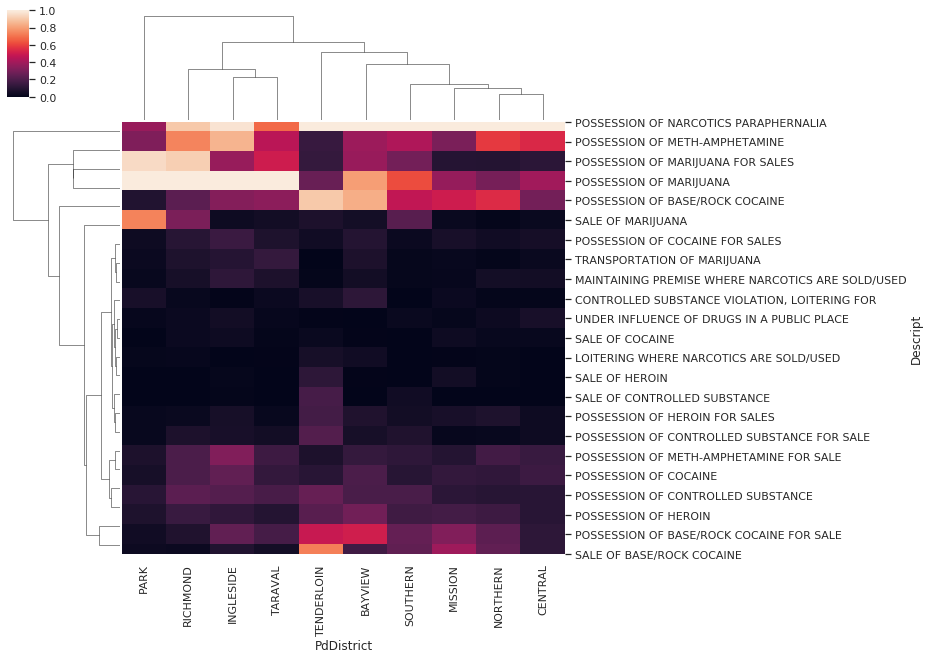

In [0]:
sns.clustermap(t,standard_scale=1)

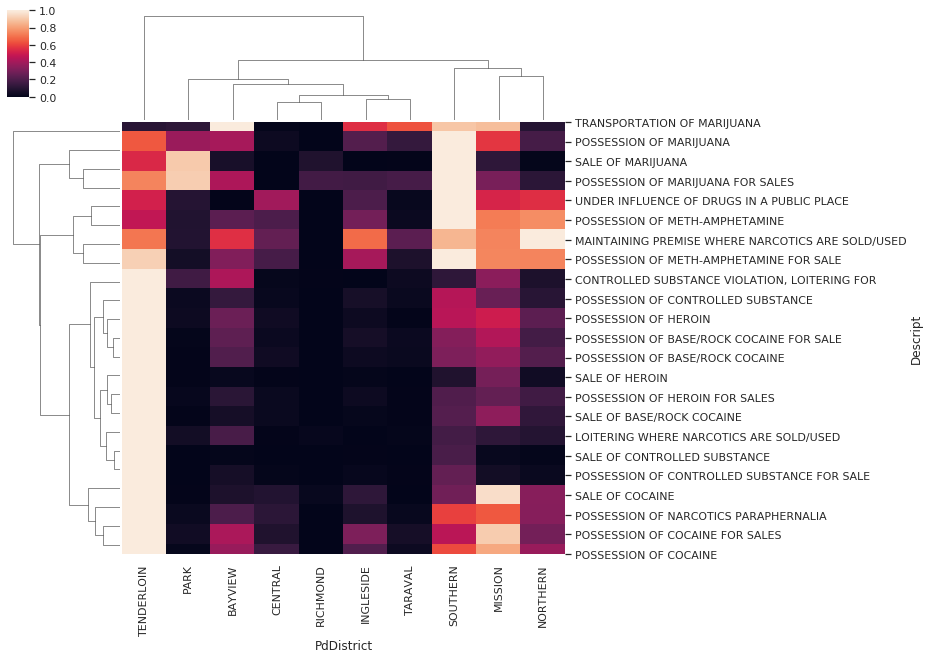

In [0]:
sns.clustermap(t,standard_scale=0)

In [0]:
"""
Nice. We could study these for a while.

But, here's the point:

I think we can simplify this if we compress different types of drug into groups.

Then, we can examine both temporal and spatail profiles.

Drug dynamics -
We'll create a 30 day window
"""

"\nNice. We could study these for a while.\n\nBut, here's the point:\n\nI think we can simplify this if we compress different types of drug into groups.\n\nThen, we can examine both temporal and spatail profiles.\n\nDrug dynamics -\nWe'll create a 30 day window\n"

In [0]:
# Let's drill down onto one
cat=d_crime[d_crime['Category']=='DRUG/NARCOTIC']

# Bin crime by 30 day window
cat['Month']=np.floor(cat['days']/30) # Approximate month (30 day window)

# Default
district='All'

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [0]:
def timeseries(dat,per):
    ''' Category grouped by month '''
    
    # Group by crime type and district 
    cat_per_time=dat.groupby('Month').Descript.value_counts(sort=True)
    t=cat_per_time.unstack().fillna(0)
        
    # Filter by crime per district
    crime_sum=t.sum(axis=0)
    crime_sum.sort_values()
    
    # Large number, so let's slice the data.
    p=np.percentile(crime_sum,per)
    ix=crime_sum[crime_sum>p]
    t=t[ix.index]
    return t
    
t_all=timeseries(cat,0)

In [0]:
barituate_features=['SALE OF BARBITUATES',
                    'POSSESSION OF BARBITUATES FOR SALES',
                    'ENCOURAGE MINOR TO USE BARBITUATES',
                    'POSSESSION OF BARBITUATES']

In [0]:
coke_features=['ENCOURAGING MINOR TO USE COCAINE',
               'SALES COCAINE BASE/SCHOOLYARD TRAFFICKING ACT VIO',
               'TRANSPORTATION OF COCAINE',
               'SALE OF COCAINE',
               'POSSESSION OF COCAINE FOR SALES',
               'POSSESSION OF COCAINE']

In [0]:
weed_features=['ENCOURAGING MINOR TO USE MARIJUANA',
               'FURNISHING MARIJUANA',
               'PLANTING/CULTIVATING MARIJUANA',
               'TRANSPORTATION OF MARIJUANA',
               'SALE OF MARIJUANA',
               'POSSESSION OF MARIJUANA FOR SALES',
               'POSSESSION OF MARIJUANA']

In [0]:
metadone_features=['TRANSPORTATION OF METHADONE',
                   'SALE OF METHADONE',
                   'POSSESSION OF METHADONE FOR SALES',
                   'POSSESSION OF METHADONE']

In [0]:
hallu_features=['TRANSPORTATION OF OPIATES',
                'SALE OF HALLUCINOGENIC',
                'POSSESSION OF OPIUM',
                'POSSESSION OF OPIUM DERIVATIVE',
                'POSSESSION OF OPIUM',
                'SALE OF OPIUM',
                'SALE OF OPIUM DERIVATIVE',
                'TRANSPORTATION OF OPIATES',
                'POSSESSION OF OPIUM FOR SALES',
                'TRANSPORTATION OF HALLUCINOGENIC',
                'POSSESSION OF OPIUM DERIVATIVE FOR SALES',
                'SALE OF OPIATES',
                'SALE OF HALLUCINOGENIC',
                'POSSESSION OF OPIUM DERIVATIVE',
                'POSSESSION OF OPIUM',
                'POSSESSION OF OPIATES FOR SALES',
                'POSSESSION OF HALLUCINOGENIC FOR SALES',
                'POSSESSION OF OPIATES',
                'POSSESSION OF HALLUCINOGENIC']

In [0]:
meth_features=['TRANSPORTATION OF AMPHETAMINE',
               'SALE OF AMPHETAMINE',
               'POSSESSION OF AMPHETAMINE',
               'SALE OF METH-AMPHETAMINE',
               'TRANSPORTATION OF METH-AMPHETAMINE',
               'POSSESSION OF AMPHETAMINE FOR SALES',
               'POSSESSION OF METH-AMPHETAMINE FOR SALE',
               'POSSESSION OF METH-AMPHETAMINE']
heroin_features=['SALE OF HEROIN',
                 'POSSESSION OF HEROIN',
                 'POSSESSION OF HEROIN FOR SALES',
                 'TRANSPORTATION OF HEROIN',
                 'SALE OF HEROIN',
                 'POSSESSION OF HEROIN FOR SALES',
                 'POSSESSION OF HEROIN']
crack_features=['POSSESSION OF BASE/ROCK COCAINE FOR SALE',
                'SALE OF BASE/ROCK COCAINE',
                'POSSESSION OF BASE/ROCK COCAINE']

In [0]:
# Lets use real dates for plotting
days_from_start=pd.Series(t_all.index*30).astype('timedelta64[D]')
dates_for_plot=date.min()+days_from_start
time_labels=dates_for_plot.map(lambda x: str(x.year)+'-'+str(x.month))

<Figure size 1080x720 with 0 Axes>

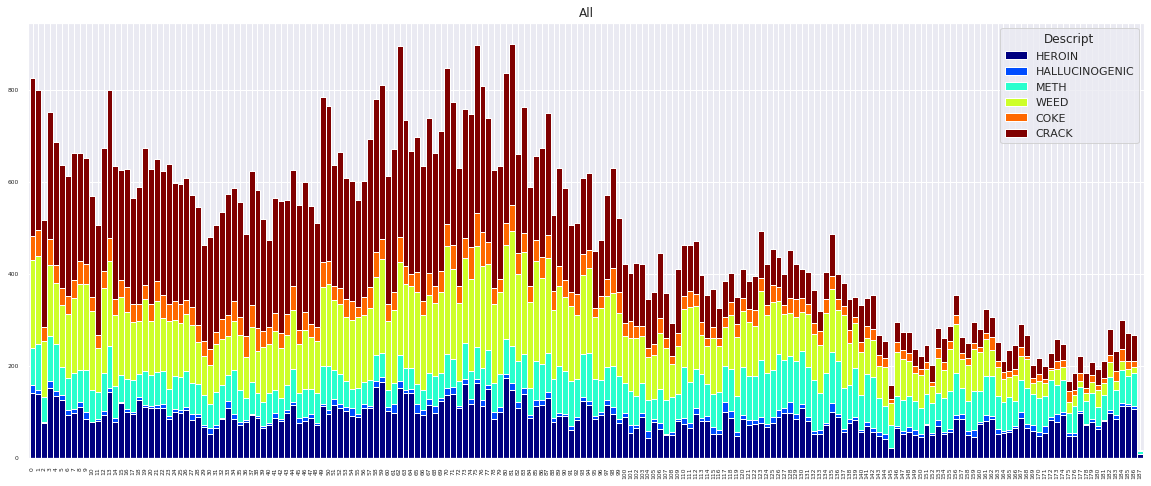

In [0]:
def drug_analysis(t,district,plot):
    fig=plt.figure(figsize=(15, 10))  
    t['BARBITUATES']=t[map(lambda s: s.strip(), barituate_features)].sum(axis=1)
    t['HEROIN']=t[map(lambda s: s.strip(), heroin_features)].sum(axis=1)
    t['HALLUCINOGENIC']=t[map(lambda s: s.strip(), hallu_features)].sum(axis=1)
    t['METH']=t[map(lambda s: s.strip(), meth_features)].sum(axis=1)
    t['WEED']=t[map(lambda s: s.strip(), weed_features)].sum(axis=1)
    t['COKE']=t[map(lambda s: s.strip(), coke_features)].sum(axis=1)
    t['METHADONE']=t[map(lambda s: s.strip(), metadone_features)].sum(axis=1)
    t['CRACK']=t[map(lambda s: s.strip(), crack_features)].sum(axis=1)
    drugs=t[['HEROIN','HALLUCINOGENIC','METH','WEED','COKE','CRACK']]
    if plot:
        drugs.index=[int(i) for i in drugs.index]
        colors = plt.cm.jet(np.linspace(0, 1, drugs.shape[1]))
        drugs.plot(kind='bar', stacked=True, figsize=(20,8), color=colors, width=1, title=district,fontsize=6)
    return drugs

drug_df_all=drug_analysis(t_all,district,True)

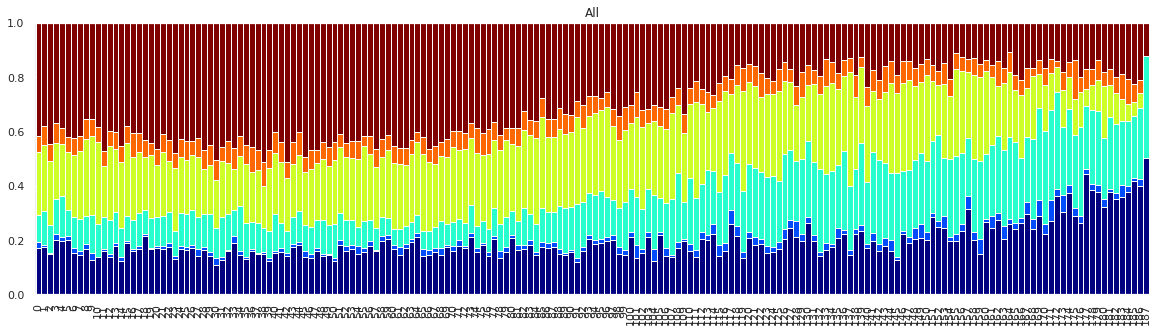

In [0]:
def drug_analysis_rescale(t,district,plot):
    t['BARBITUATES']=t[map(lambda s: s.strip(), barituate_features)].sum(axis=1)
    t['HEROIN']=t[map(lambda s: s.strip(), heroin_features)].sum(axis=1)
    t['HALLUCINOGENIC']=t[map(lambda s: s.strip(), hallu_features)].sum(axis=1)
    t['METH']=t[map(lambda s: s.strip(), meth_features)].sum(axis=1)
    t['WEED']=t[map(lambda s: s.strip(), weed_features)].sum(axis=1)
    t['COKE']=t[map(lambda s: s.strip(), coke_features)].sum(axis=1)
    t['METHADONE']=t[map(lambda s: s.strip(), metadone_features)].sum(axis=1)
    t['CRACK']=t[map(lambda s: s.strip(), crack_features)].sum(axis=1)
    drugs=t[['HEROIN','HALLUCINOGENIC','METH','WEED','COKE','CRACK']]
    if plot:
        drugs=drugs.div(drugs.sum(axis=1),axis=0)
        drugs.index=[int(i) for i in drugs.index]
        colors = plt.cm.GnBu(np.linspace(0, 1, drugs.shape[1]))
        colors = plt.cm.jet(np.linspace(0, 1, drugs.shape[1]))
        drugs.plot(kind='bar', stacked=True, figsize=(20,5), color=colors, width=1, title=district, legend=False)
        plt.ylim([0,1])
    return drugs

drug_df_all=drug_analysis_rescale(t_all,district,True)

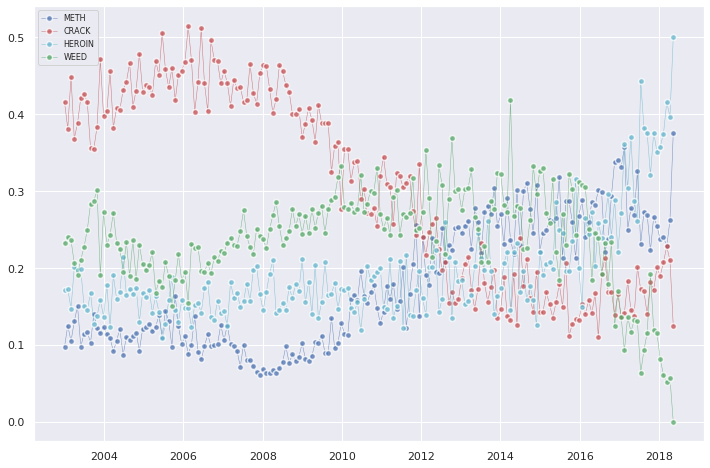

In [0]:
#let's add the real dates
dates_for_plot.index=dates_for_plot
fig=plt.figure(figsize=(12,8))
for d,c in zip(['METH','CRACK','HEROIN','WEED'],['b','r','c','g']):
    plt.plot(dates_for_plot.index,drug_df_all[d],'o-',color=c,ms=6,mew=1.5,mec='white',linewidth=0.5,label=d,alpha=0.75)
plt.legend(loc='upper left',scatterpoints=1,prop={'size':8})